<a href="https://colab.research.google.com/github/Luluabidah/Unsupervised-Learning/blob/main/C2.23-UL-20123094-Lulu%20Abidah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estimated number of clusters: 3
Homogeneity: 0.872
Completeness: 0.872
V-measure: 0.872
Adjusted Rand Index: 0.912
Adjusted Mutual Information: 0.871
Silhouette Coefficient: 0.753


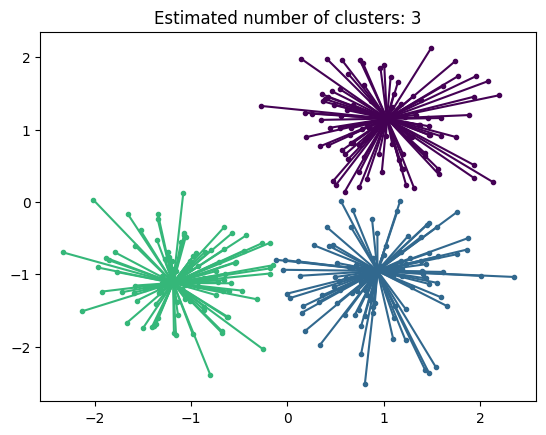

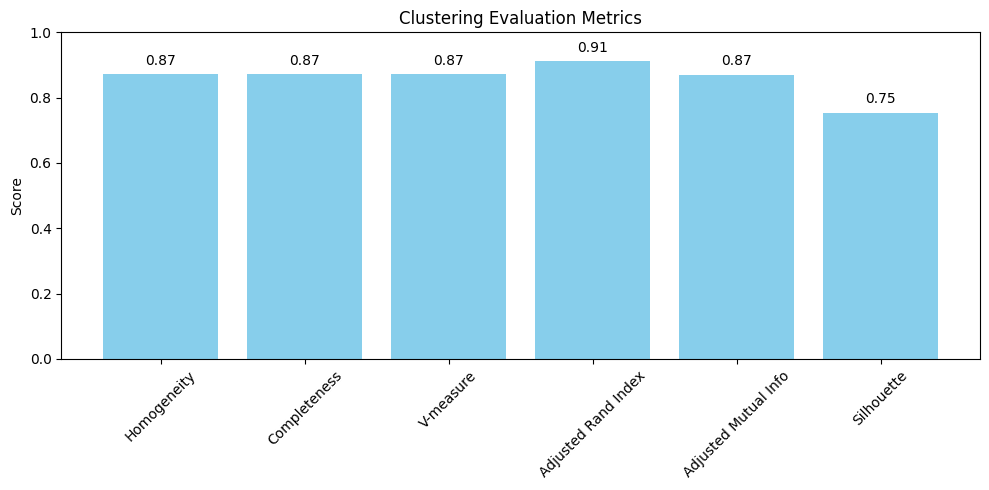

In [2]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import numpy as np

from sklearn import metrics
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs

#Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=300, centers=centers, cluster_std=0.5, random_state=0
)

#Compute Affinity Propagation
af = AffinityPropagation(preference=-50, random_state=0).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X, labels, metric="sqeuclidean")
)

#Plot Result
import matplotlib.pyplot as plt

plt.close("all")
plt.figure(1)
plt.clf()

colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, 4)))

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.scatter(
        X[class_members, 0], X[class_members, 1], color=col["color"], marker="."
    )
    plt.scatter(
        cluster_center[0], cluster_center[1], s=14, color=col["color"], marker="o"
    )
    for x in X[class_members]:
        plt.plot(
            [cluster_center[0], x[0]], [cluster_center[1], x[1]], color=col["color"]
        )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

# Visualisasi Error Metrics
import matplotlib.pyplot as plt

# Data untuk grafik
metric_names = [
    "Homogeneity",
    "Completeness",
    "V-measure",
    "Adjusted Rand Index",
    "Adjusted Mutual Info",
    "Silhouette"
]

metric_values = [
    metrics.homogeneity_score(labels_true, labels),
    metrics.completeness_score(labels_true, labels),
    metrics.v_measure_score(labels_true, labels),
    metrics.adjusted_rand_score(labels_true, labels),
    metrics.adjusted_mutual_info_score(labels_true, labels),
    metrics.silhouette_score(X, labels, metric="sqeuclidean")
]

# Plot bar chart
plt.figure(figsize=(10, 5))
bars = plt.bar(metric_names, metric_values, color='skyblue')
plt.ylim(0, 1)
plt.title("Clustering Evaluation Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)

# Menambahkan nilai di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.02, f"{height:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

